In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msgno
import seaborn as sns
from scipy.stats import zscore as zs

%matplotlib inline
pd.set_option('display.max_columns',None)

In [252]:
# File to Load
train_data_to_load = "ml_case_training_data.csv"
hist_data_to_load = "ml_case_training_hist_data.csv"
churn_data_to_load = "ml_case_training_output.csv"

In [253]:
# Read the Data
train_data_df = pd.read_csv(train_data_to_load)
hist_data_df = pd.read_csv(hist_data_to_load)
churn_data_df = pd.read_csv(churn_data_to_load)

In [254]:
train_data_df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [255]:
hist_data_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [256]:
churn_data_df.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [257]:
train_data_df.shape

(16096, 32)

In [258]:
hist_data_df.shape

(193002, 8)

In [259]:
churn_data_df.shape

(16096, 2)

### Historical Price Data

In [260]:
hist_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### we notice that there are missing values in the historical price data

In [261]:
# descriptive statistics of the historical price data
hist_data_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Observations: we notice a downward trend in average price of energy and average price of power from the first to the third period
#### Average energy price per period
1. average price of energy for the 1st period was 0.140991
2. average price of energy for the 2nd period was 0.054412
3. average price of energy for the 3rd period was 0.030712

#### Average power price per period
1. average price of power for the 1st period was 43.325546
2. average price of power for the 2nd period was 10.698201
3. average price of power for the 3rd period was 6.455436

#### Missing Values

In [262]:
hist_data_df.isna().sum().sort_values(ascending = False)

price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
id                 0
price_date         0
dtype: int64

In [263]:
perc_missing_price_values = hist_data_df.isnull().mean() * 100
perc_missing_price_values

id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64

### Observations: 
1. there are 1359 missing values in the historical price data
2. this number represents 0.704138% of the column where the data is missing
3. the price of power contains negative values

### Churn Data

In [264]:
churn_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [265]:
# churn count
churn_count = churn_data_df['churn'].value_counts()
churn_count

0    14501
1     1595
Name: churn, dtype: int64

In [266]:
# Churn rate
churn_rate = churn_data_df['churn'].value_counts() / churn_data_df.shape[0] * 100
churn_rate

0    90.090706
1     9.909294
Name: churn, dtype: float64

### Observations: January to March 2016
1. 1595 customers churned in three months between January and March 2016
2. There were 14501 active customers
3. Customer retention is 90.09%
4. Customer attrition is 9.91%
5. The churn data has no missing values

### Historical Customer Data

In [267]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [268]:
# descriptive statistics
train_data_df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [269]:
# missing values
train_data_df.isna().sum().sort_values(ascending = False)

campaign_disc_ele           16096
forecast_bill_12m           12588
date_first_activ            12588
forecast_cons               12588
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
activity_new                 9545
channel_sales                4218
date_modif_prod               157
forecast_price_pow_p1         126
forecast_price_energy_p2      126
forecast_price_energy_p1      126
forecast_discount_energy      126
origin_up                      87
date_renewal                   40
net_margin                     15
margin_net_pow_ele             13
margin_gross_pow_ele           13
pow_max                         3
date_end                        2
imp_cons                        0
nb_prod_act                     0
num_years_antig                 0
id                              0
has_gas                         0
forecast_meter_rent_12m         0
forecast_cons_year              0
date_activ                      0
cons_last_month                 0
cons_gas_12m  

In [270]:
perc_missing_customer_data = train_data_df.isnull().mean() * 100
perc_missing_customer_data.sort_values(ascending = False)

campaign_disc_ele           100.000000
forecast_bill_12m            78.205765
date_first_activ             78.205765
forecast_cons                78.205765
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
activity_new                 59.300447
channel_sales                26.205268
date_modif_prod               0.975398
forecast_price_pow_p1         0.782803
forecast_price_energy_p2      0.782803
forecast_price_energy_p1      0.782803
forecast_discount_energy      0.782803
origin_up                     0.540507
date_renewal                  0.248509
net_margin                    0.093191
margin_net_pow_ele            0.080765
margin_gross_pow_ele          0.080765
pow_max                       0.018638
date_end                      0.012425
imp_cons                      0.000000
nb_prod_act                   0.000000
num_years_antig               0.000000
id                            0.000000
has_gas                       0.000000
forecast_meter_rent_12m  

### Observations
1. The average tenure of a customer is 5 years
2. The average net_margin is $217.99

#### Missing value observations
1. The campaign_disc_ele column is completely missing
2. The date_first_activ, forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, and forecast_cons columns have 78.206% of their data missing
3. The activity_new, and channel_sales columns have 59.30% and  26.21% of their data missing respectively
4. All other columns have less than 1% or no missing data
5. 14 columns contain negative values

### Data Cleaning: Historical Price Data

#### Handling Negative Values
We will convert the negative prices to positive values

In [271]:
negative_columns = ['price_p1_fix', 'price_p2_fix', 'price_p3_fix']
hist_data_df[negative_columns] = hist_data_df[negative_columns].apply(abs)

In [272]:
hist_data_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [273]:
hist_data_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Handling Missing Data
1. How missing data is handled depends on how data is missing, we need to deermine if the data is missing at random or missing not at random, meaning if there is a relationship between the missing variables.
2. One way to determine if there is any relationship between the variables is to visualize the correlation between numeric variables in the data.

<AxesSubplot:>

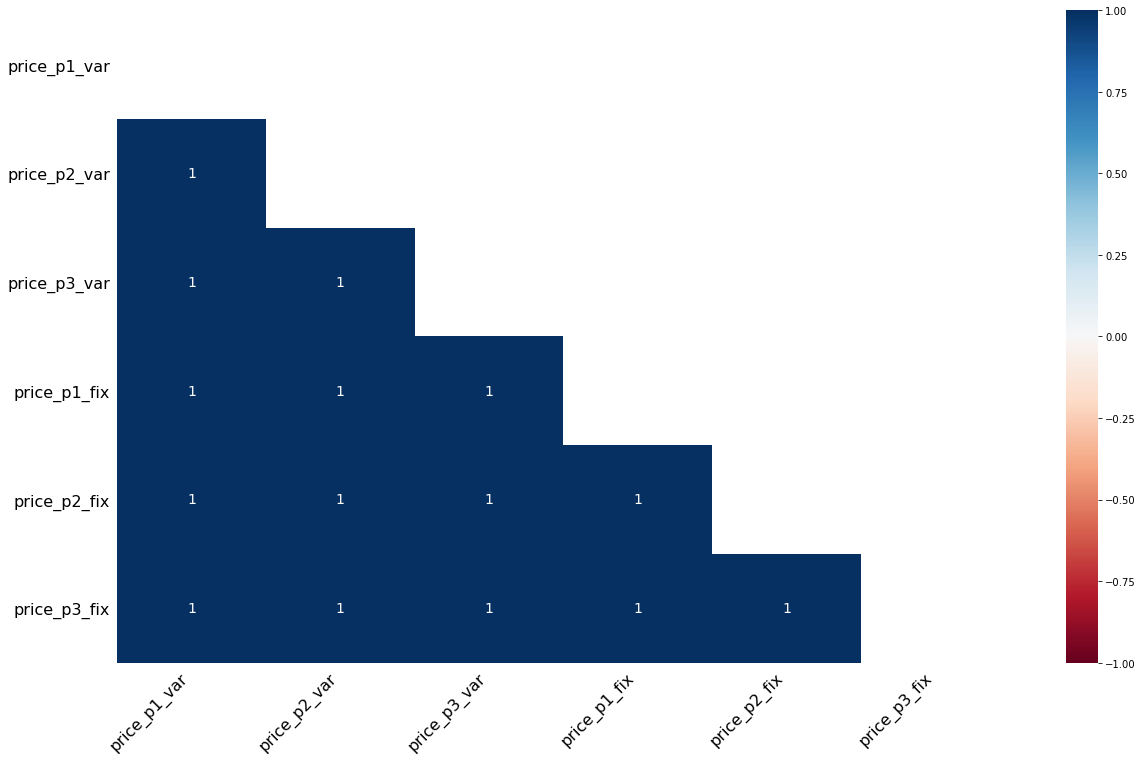

In [274]:
# Visualize the correlation between the numeric variables of the historical price data
msgno.heatmap(hist_data_df)

#### In the next step, we want to take a closer look at the missing data by grouping them by the price_date column
1. create a dataframe of the missing values
2. get the unique dates of the missing values

In [275]:
missing_price_df = hist_data_df[hist_data_df.isnull().any(axis=1)]
missing_price_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
# extract the unique dates of missing data
missing_value_dates = missing_price_df['price_date'].unique()
missing_value_ids = missing_price_df['id'].unique()

# Create a time dataframe with the unique dates
missing_value_dates_df = pd.DataFrame(data=missing_value_dates, columns=['price_date'])
missing_value_dates_df.sort_values(by=['price_date'])

,price_date
9,2015-01-01
11,2015-02-01
8,2015-03-01
0,2015-04-01
2,2015-05-01
1,2015-06-01
10,2015-07-01
3,2015-08-01
4,2015-09-01
7,2015-10-01


#### Observations
1. The missing values visualization show that there is a high correlation between the numeric columns and the price column
2. There are 1359 customers with issing price data in one month
3. This strong correlation and the fact that the prices are missing in the same month suggests there is a relationship between the propensity of a price value to be missing and its values
4. This suggests the price values are missing not at random

#### Imputation: Historical Price Data
1. Pandas has some imputation methods for filling missing values

In [277]:
# Make a copy of hist_data_df
hist_data_ff_df = hist_data_df.copy(deep=True)

# Fill missing values with the fill forward method
hist_data_ff_df.fillna(method = 'ffill', inplace=True)
hist_data_idx = hist_data_df[hist_data_df.isnull().any(axis=1)].index.values.tolist()
hist_data_ff_df.iloc[hist_data_idx,3:9].head()

,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,0.000000,0.000000,44.266931,0.000000,0.000000
221,0.000000,0.000000,44.266931,0.000000,0.000000
377,0.087970,0.000000,44.266931,0.000000,0.000000
413,0.102239,0.070381,40.565969,24.339581,16.226389
461,0.000000,0.000000,44.266931,0.000000,0.000000


In [278]:
hist_data_ff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  193002 non-null  float64
 3   price_p2_var  193002 non-null  float64
 4   price_p3_var  193002 non-null  float64
 5   price_p1_fix  193002 non-null  float64
 6   price_p2_fix  193002 non-null  float64
 7   price_p3_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [279]:
hist_data_ff_df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141006,0.054376,0.030689,43.326213,10.689406,6.450494
std,0.025091,0.050040,0.036333,5.431161,12.853850,7.781323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085450,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Data Cleaning: Historical Customer Data

<AxesSubplot:>

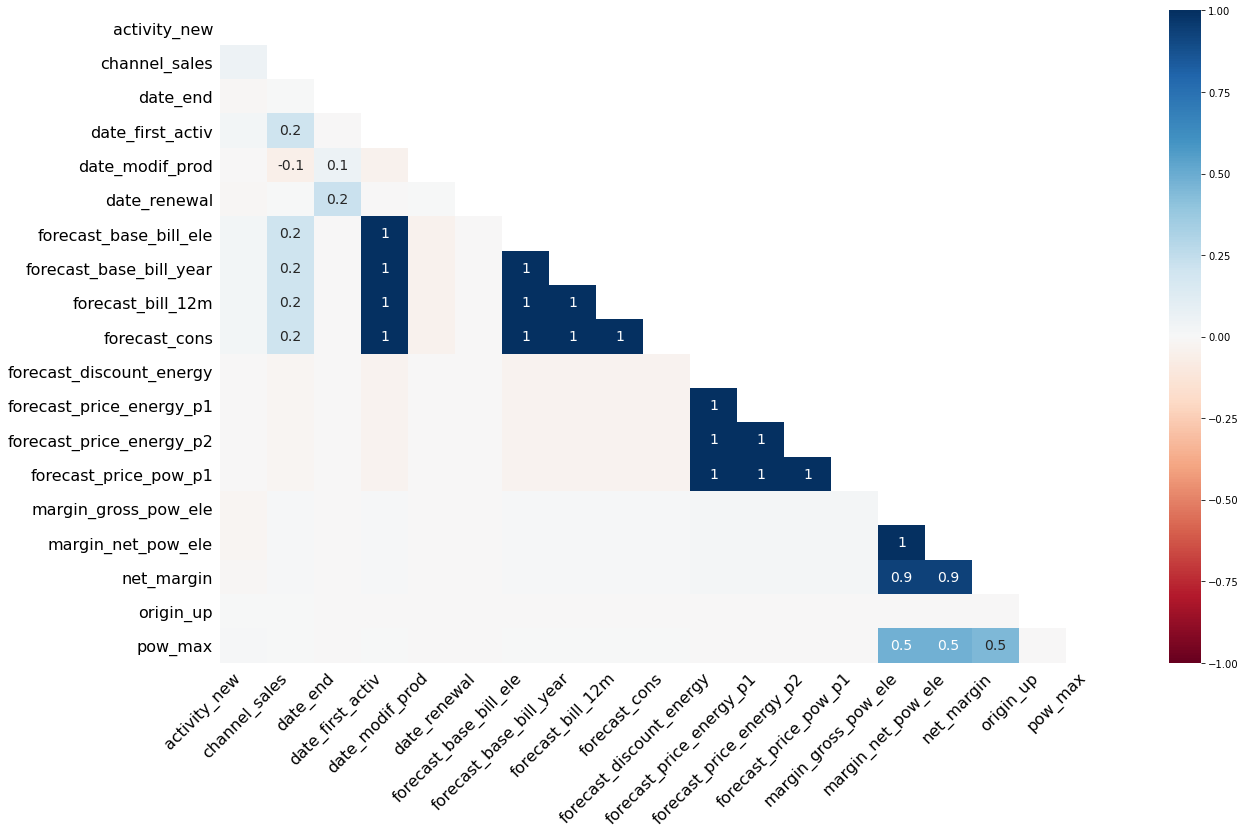

In [280]:
# Visualize the correlation between the numeric variables of the historical customer data
msgno.heatmap(train_data_df)

#### Observations: Historical Customer Data Missing Values
1. The variable campaign_disc_elec is completely missing at random on all rows. We can drop this column.
2. While the variable date_first_activ, and date_activ seem similar at first look, a closer look t the characteristics of the column show that we cannot replace the missing values in the datae_firstactv column with values from the data_activ column.
3. The variable activity_new is MCAR and has very low correlation with any of the variables. We can drop this column.
4. There is strong correlation between the net_margin column and other numerical variables  margin_gross_pow_elec and margin_net_pow_ele. This may be an evidence of multicolinearity.
5. There is no correlation beween the origin_up and pow_max variables and other variables. These are MCAR and can be dropped listwise.
6. Forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m and forecast_cons variables are highly correlated with the date_first_activ variable's missingness.

In [281]:
# Drop the column activity_new and campaign_disc_elec and dropna
train_data_drop_df = train_data_df.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)
remove_na =  ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
train_data_drop_df.dropna(subset=remove_na, how='any', inplace=True)

In [ ]:
# Drop the column activity_new and campaign_disc_elec and dropna
train_data_drop_df = train_data_df.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)
remove_na = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1', 'channel_sales', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons']
train_data_drop_df.dropna(subset=remove_na, how='any', inplace=True)

In [ ]:
# Drop the column activity_new and campaign_disc_elec
pco_main_drop = pco_main.drop(labels= ['activity_new','campaign_disc_ele'] , axis=1)

# Remove date_end date_modif_prod date_renewal origin_up pow_max margin_gross_pow_ele margin_net_pow_ele net_margin
brush = ['date_end','date_modif_prod','date_renewal','origin_up','pow_max','margin_gross_pow_ele',
         'margin_net_pow_ele', 'net_margin','forecast_discount_energy','forecast_price_energy_p1',
         'forecast_price_energy_p2','forecast_price_pow_p1']
pco_main_drop.dropna(subset=brush, how='any',inplace=True)

In [282]:
train_data_drop_df.shape

(15674, 30)

In [283]:
num_describe = train_data_drop_df.describe()
num_describe

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,3368.000000,3368.000000,3368.000000,3368.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.915538e+05,3.132277e+04,1.929701e+04,335.473230,335.473230,3844.716391,206.082509,2350.149525,1888.518311,0.976139,70.163502,0.135925,0.052858,43.522175,194.139225,22.400375,21.372271,1.348092,217.349803,5.052188,20.438270
std,6.724861e+05,1.716293e+05,8.229678e+04,647.645417,647.645417,5397.552467,452.670976,3985.239567,5233.237167,5.124103,78.602849,0.026282,0.048638,5.221781,491.951025,23.609510,27.938879,1.475092,364.414103,1.670284,21.164053
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,5.883500e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1156.292500,0.000000,512.210000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.950000,11.950000,1.000000,51.962500,4.000000,12.500000
50%,1.520100e+04,0.000000e+00,8.960000e+02,163.615000,163.615000,2198.085000,43.125000,1176.060000,376.000000,0.000000,19.430000,0.142881,0.086163,44.311378,43.980000,20.950000,20.800000,1.000000,119.385000,5.000000,13.856000
75%,4.948550e+04,0.000000e+00,4.096000e+03,396.512500,396.512500,4254.197500,228.510000,2673.220000,1990.000000,0.000000,131.500000,0.146348,0.098837,44.311378,217.352500,29.640000,29.585000,1.000000,274.130000,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [284]:
train_data_drop_df.isna().sum().sort_values(ascending = False)

forecast_base_bill_ele      12306
forecast_cons               12306
forecast_bill_12m           12306
date_first_activ            12306
forecast_base_bill_year     12306
channel_sales                4154
id                              0
forecast_price_pow_p1           0
has_gas                         0
imp_cons                        0
forecast_price_energy_p1        0
margin_gross_pow_ele            0
margin_net_pow_ele              0
nb_prod_act                     0
net_margin                      0
num_years_antig                 0
origin_up                       0
forecast_price_energy_p2        0
forecast_cons_year              0
forecast_meter_rent_12m         0
forecast_discount_energy        0
forecast_cons_12m               0
date_renewal                    0
date_modif_prod                 0
date_end                        0
date_activ                      0
cons_last_month                 0
cons_gas_12m                    0
cons_12m                        0
pow_max       

#### Fix Negative values in the historical customer data

In [285]:
train_data_negative_cols = num_describe[(num_describe<0)]
numeric = [col_name for col_name in train_data_negative_cols.columns
           if train_data_negative_cols[col_name].dtype == 'float64' 
           or train_data_negative_cols[col_name].dtype == 'int64']
train_data_drop_df[numeric] = train_data_drop_df[numeric].apply(abs)

In [286]:
train_data_drop_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.567400e+04,1.567400e+04,1.567400e+04,3368.000000,3368.000000,3368.000000,3368.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916143e+05,3.132400e+04,1.941588e+04,335.689941,335.689941,3847.600625,206.082509,2359.676441,1911.698354,0.976139,70.210965,0.135925,0.052858,43.522191,196.641669,23.556272,24.125235,1.348092,221.259158,5.052188,20.438270
std,6.724688e+05,1.716291e+05,8.226881e+04,647.533084,647.533084,5395.496233,452.670976,3979.605687,5224.813531,5.124103,78.560454,0.026282,0.048638,5.221651,490.956048,22.456277,25.599218,1.475092,362.053657,1.670284,21.164053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.893250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1157.315000,0.000000,514.045000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.360000,12.360000,1.000000,52.802500,4.000000,12.500000
50%,1.522000e+04,0.000000e+00,9.090000e+02,163.870000,163.870000,2204.835000,43.125000,1178.970000,382.000000,0.000000,19.430000,0.142881,0.086163,44.311378,44.870000,21.090000,21.090000,1.000000,120.545000,5.000000,13.856000
75%,4.953825e+04,0.000000e+00,4.131500e+03,396.512500,396.512500,4254.197500,228.510000,2677.220000,1994.750000,0.000000,131.500000,0.146348,0.098837,44.311378,217.962500,29.640000,29.760000,1.000000,275.797500,6.000000,19.800000
max,1.609711e+07,4.154590e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,525.540000,615.660000,32.000000,24570.650000,16.000000,500.000000


In [287]:
train_data_drop_df.shape

(15674, 30)

In [288]:
train_data_drop_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2010-04-08,2015-04-12,1399.83,1399.83,14559.74,1052.37,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000


#### Merge the historical customer and price data

In [289]:
train_data_merged_df = train_data_drop_df.merge(right=churn_data_df, on=['id'])
train_data_merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2010-04-08,2015-04-12,1399.83,1399.83,14559.74,1052.37,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0


In [290]:
train_data_merged_df.shape

(15674, 31)

In [291]:
# train_data_merged_df['has_gas'] = train_data_merged_df["has_gas"].replace({'t':'Yes','f':'No'})
train_data_merged_df["churn"] = train_data_merged_df["churn"].replace({1:'Churned', 0:'Retained'})

In [292]:
train_data_merged_df.shape

(15674, 31)

In [293]:
train_data_merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,41.76,41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,Retained
1,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,Retained
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,Retained
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,Retained
4,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2010-04-08,2015-04-12,1399.83,1399.83,14559.74,1052.37,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,3.18,3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,Retained


In [294]:
# Obtain all the variables except for id
variables = [column_name for column_name in train_data_merged_df.columns if column_name != 'id']

# Obtain all the categorical variables except for id
categorical = [column_name for column_name in variables if train_data_merged_df[column_name].dtype == 'object']

# Obtain all the Date Variables
dates = [column_name for column_name in variables if train_data_merged_df[column_name].dtype == 'datetime64[ns]']

# Obtain all the numeric columns
numeric_ = [column_name for column_name in variables
           if column_name not in categorical 
           and column_name != 'id'
           and column_name != 'churn'
           and column_name not in dates]
non_numeric = [col_name for col_name in variables
              if col_name in categorical
              or col_name in dates]

In [295]:
non_numeric

['channel_sales',
 'date_activ',
 'date_end',
 'date_first_activ',
 'date_modif_prod',
 'date_renewal',
 'has_gas',
 'origin_up',
 'churn']

In [297]:
train_numeric = train_data_merged_df.drop(labels= ['channel_sales', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'origin_up'], axis =1)

In [299]:
train_numeric.shape

(15674, 24)

### Visualization: Customer Attrition By Tenure

1. To visualize customer tenure by churn, we would exclude outlier data by focusing on the z-score of the num_years_antig (tenure) column
2. We would take the z-scores of the num_years_antig column
3. Convert the z-scores to absolute values
4. Subset the train_data_merged_df dataframe to select the 'churn' and 'num_years_antig' columns
5. Append the z-scores to the subsetted dataframe
6. Remove outlier scores by selecting only values < 3 standard deviations (we are not using +- 3 because we already converted the z-scores to absolute values)
7. Visualize the output dataset

Text(0.5, 1.0, 'Customer Attrition by Tenure')

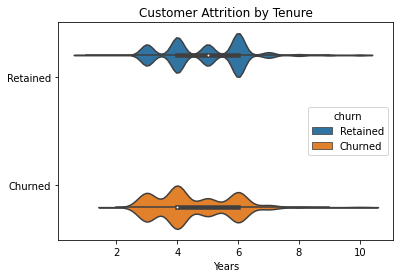

In [300]:
# obtain z_scores of tenure
tenure_zscores = zs(a=train_data_merged_df['num_years_antig'])

# select the tenure and churn columns for graphing
churn_tenure = train_data_merged_df[['churn','num_years_antig']]
# append the z_score column
churn_tenure = churn_tenure.assign(z_score =  np.abs(tenure_zscores))
# Remove outliers
churn_tenure_filtered = churn_tenure[churn_tenure['z_score'] < 3]
# Visualize churn by tenure
ax = sns.violinplot(y="churn", x='num_years_antig', data=churn_tenure_filtered, hue='churn')
ax.set(xlabel='Years', ylabel='')
ax.set_title('Customer Attrition by Tenure')

#### In the next cell, we subset the merged dataset to get the most successful campaigns
1. We subset by retained customers where net_margin > 0
2. We then take a count of the campaign code to see which ones were most subscribed to by customers
3. We then aggregate to the the net_margin of the successful campaign

In [301]:
# Most successful electricty campaign
campaign_count_df = train_data_merged_df.loc[(train_data_merged_df['churn']=='Retained') & (train_data_merged_df['net_margin']>0),['id', 'origin_up','net_margin']]

campaign_count_df.value_counts(subset=['origin_up'])

origin_up                       
lxidpiddsbxsbosboudacockeimpuepw    6584
kamkkxfxxuwbdslkwifmmcsiusiuosws    4188
ldkssxwpmemidmecebumciepifcamkci    3201
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
dtype: int64

In [302]:
# margin of the most successful compaign
campaign_count_df.groupby('origin_up')['net_margin'].agg('sum').sort_values(ascending=False)

origin_up
lxidpiddsbxsbosboudacockeimpuepw    1541159.95
ldkssxwpmemidmecebumciepifcamkci     814230.02
kamkkxfxxuwbdslkwifmmcsiusiuosws     717939.95
usapbepcfoloekilkwsdiboslwaxobdp        250.40
ewxeelcelemmiwuafmddpobolfuxioce         46.22
Name: net_margin, dtype: float64

#### In the next cell, we select top customers with postive net_margin
1. we select customer id, tenure, and net_margin where the customer did not churn
2. we sort the output in descending order

In [303]:
# Select current customers with positive net margins
top_customers_by_margin = train_data_merged_df.loc[(train_data_merged_df['churn']>='Retained') & (train_data_merged_df['net_margin']>0),['id','num_years_antig','net_margin']]

# Top customers by net margin
top_customers_by_margin.sort_values(by=['net_margin'], ascending=False).head(20)

,id,num_years_antig,net_margin
11502,d00e8a9951b5551d8f02e45f9ed2b0dd,3,10203.50
6930,78bd1c5c0c67f2be6de89b19df5f8861,3,5625.14
13259,818b8bca0a9d7668252d46b978169325,4,4346.37
8378,a3a739686fbd5ba8b4a21ec835507b6d,4,4305.79
324,89b3406c3ba717f1b788ceeb5af9e8b9,3,4161.74
10100,93435ecb05910c7b87e0ae9dbedb2882,4,4148.99
12028,4519e6a8928a015819466fc9de0fa49e,3,4040.60
6405,933527d7a2f669af49075a2380c10ded,4,3744.72
6850,43580ef6cc40fcfd0a9b76eee17a267a,4,3716.78
13553,ee98a86efa759681cc59c7d4e0d0312f,4,3407.65


### Observations
1. From the violin plot, which helps us visualize the multimodal distributions in the dataset, we see that the median tenure (in the widest peak) is 4 years
2. Very few customers churn after 7 years, a large number of customers in the 4th years or before
3. A Retained customer has a median tenure of 5 years
4. lxidpiddsbxsbosboudacockeimpuepw was the most popular campaign with 6584 customers and a net_margin of 1,541,159.95
5. More than 95% of the profitable customers are within the likely churn tenure (4 years or less)

### Modelling

Retained: 14154
Churned: 1520
Proportion of Churned Customers: 0.09697588362893965


<AxesSubplot:ylabel=' '>

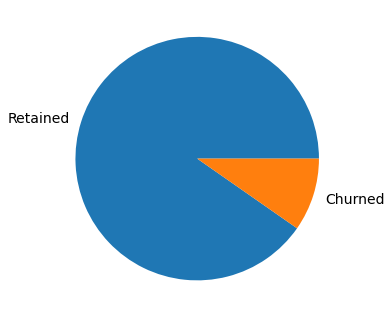

In [304]:
print("Retained: " + str(len(train_data_merged_df[train_data_merged_df["churn"] == 'Retained'])))
print("Churned: " + str(len(train_data_merged_df[train_data_merged_df["churn"] == 'Churned'])))
print("Proportion of Churned Customers: " + str(len(train_data_merged_df[train_data_merged_df["churn"] == 'Churned'])/ train_data_merged_df.shape[0]))

# Determine the number of Fraudulent transactions
churn_proportion = train_data_merged_df.copy()
churn_proportion[" "] = np.where(churn_proportion["churn"] == 'Churned' ,  "Churned", "Retained")

%matplotlib inline
# plot chart
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect='equal')
churn_proportion[" "].value_counts().plot(kind='pie',  ax=ax1, startangle=0, legend = False, fontsize=14)

#### Observations
1. It is important to not that this is an imbalanced dataset.
2. This fact may inform how we implement our model where we may apply undersampling or oversampling.
3. We would start by trying naive models and evaluatiing their performance with metrics like Recall, and Precision

In [305]:
train_data_merged_df.shape

(15674, 31)

In [311]:
train_data_merged_df['has_gas'] = train_data_merged_df["has_gas"].replace({'Yes': 1,'No': 0})
train_data_merged_df["churn"] = train_data_merged_df["churn"].replace({'Churned': 1, 'Retained': 0})

In [314]:
train_numeric['has_gas'] = train_numeric["has_gas"].replace({'t': 1,'f': 0})
train_numeric["churn"] = train_numeric["churn"].replace({'Churned': 1, 'Retained': 0})